In [1]:
import os
import pandas as pd
import psycopg2
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('data/company_reports/LSE_AVV_income_statement.csv',index_col='Period Ending',skiprows=1)

In [3]:
df.head()

,31/3/94,31/3/95,31/3/96,31/3/97,31/3/98,31/3/99,31/3/00,31/3/01,31/3/02,31/3/03,...,31/3/11,31/3/12,31/3/13,31/3/14,31/3/15,31/3/16,31/3/17,31/3/18,31/3/19,31/3/20
Period Ending,,,,,,,,,,,,,,,,,,,,,
Result Type,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,...,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS
Turnover,10.9,11.9,14.2,17.3,17.7,17.9,23.9,28.1,31.8,36.0,...,174.0,195.9,220.2,237.3,208.7,201.5,432.8,486.3,766.6,833.8
Cost of sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31.8,-36,...,-39.2,-16.1,-16.1,-17.4,-15.5,-14.7,-137.1,-150.8,-193.2,-190.7
Gross profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.8,179.9,204.1,220.0,193.1,186.8,295.7,335.5,573.4,643.1
Administrative expenses,-9.6,-11.2,-12.2,-15.2,-15.1,-15,-19.4,-22.7,-5.3,-5.9,...,-82.1,-123.4,-141.7,-151.4,-138.6,-157.4,-245.7,-297.6,-519.9,-552.4


In [4]:
df2 = df.transpose()

In [5]:
if 'Result Type' in df2.columns:
    del df2['Result Type']
if ' ' in df2.columns:
    del df2[' ']
df2.index = pd.to_datetime(df2.index)
df2 = df2.astype(float)

In [6]:
df2.head()

Period Ending,Turnover,Cost of sales,Gross profit,Administrative expenses,Operating profit (standardised),Interest paid (net),Associates & joint ventures,Other income/expense,Pre-tax profit,Taxation,...,Average shares (adjusted),Average shares (diluted),Research & development,Rental & lease expense,Stock based compensation,Capital expenditure,Number of employees,Tax rate %,Market capitalisation,Enterprise value
1994-03-31,10.9,NaN,NaN,-9.6,1.3,0.0,NaN,NaN,1.3,-0.3,...,33.2,33.2,2.5,0.4,NaN,-0.4,144.0,25.4,NaN,NaN
1995-03-31,11.9,NaN,NaN,-11.2,0.7,-0.2,NaN,0.1,0.6,-0.3,...,33.2,33.2,2.3,1.0,NaN,-0.7,148.0,62.7,NaN,NaN
1996-03-31,14.2,NaN,NaN,-12.2,2.0,-0.3,NaN,0.0,1.7,-0.5,...,35.1,35.1,2.2,0.4,NaN,-0.7,164.0,29.8,NaN,NaN
1997-03-31,17.3,NaN,NaN,-15.2,2.2,-0.2,NaN,-0.1,1.8,-0.7,...,39.1,39.1,2.8,0.5,NaN,-0.9,182.0,37.4,39.0,37.4
1998-03-31,17.7,NaN,NaN,-15.1,2.7,0.1,NaN,NaN,2.8,-1.0,...,46.7,47.9,2.9,0.5,NaN,-0.4,184.0,37.8,64.8,60.4


In [7]:
for col in df2.columns: 
    print(col)

Turnover
Cost of sales
Gross profit
Administrative expenses
Operating profit (standardised)
Interest paid (net)
Associates & joint ventures
Other income/expense
Pre-tax profit
Taxation
Post-tax profit
Minorities
Extraordinary items
Discontinued operations
Profit for financial year
EBITDA
Depreciation & amortisation
EBIT
Interest expense
Pre-tax profit
Discontinued post-tax profit
Dividend (announced) ps
Dividend (adjusted) ps
EPS rep. continuous
EPS rep. discontinued
EPS reported
EPS norm. continuous
Pre-tax profit
Post-tax profit
EBIT
EBITDA
Operating profit
Post-tax profit
EBIT
EBITDA
EPS (basic)
EPS (diluted)
Number of shares
Average shares (adjusted)
Average shares (diluted)
Research & development
Rental & lease expense
Stock based compensation
Capital expenditure
Number of employees
Tax rate %
Market capitalisation
Enterprise value


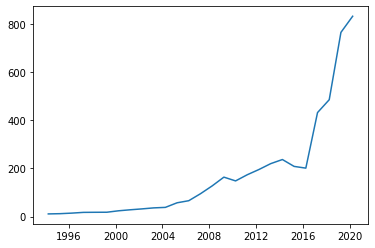

In [8]:
pyplot.plot(df2.index,df2['Turnover'])

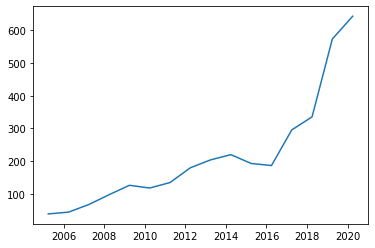

In [9]:
pyplot.plot(df2.index,df2['Gross profit'])

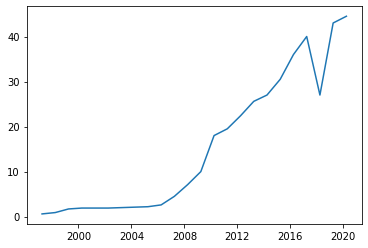

In [10]:
pyplot.plot(df2.index,df2['Dividend (adjusted) ps'])

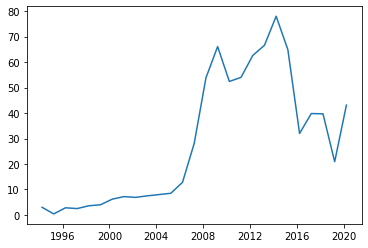

In [11]:
pyplot.plot(df2.index,df2['EPS reported'])

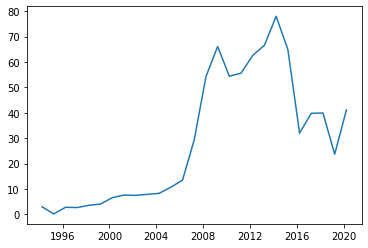

In [12]:
pyplot.plot(df2.index,df2['EPS norm. continuous'])

In [13]:
# placeholders = ', '.join(['%s'] * len(response_dict))
# columns = ', '.join(response_dict.keys())
# sql = f"INSERT INTO {self.table} ( {columns} ) VALUES ( {placeholders} )"

# self.cursor.execute(sql, list(response_dict.values()))
# self.db.commit()

In [17]:
df2.reset_index()

Period Ending,index,Turnover,Cost of sales,Gross profit,Administrative expenses,Operating profit (standardised),Interest paid (net),Associates & joint ventures,Other income/expense,Pre-tax profit,...,Average shares (adjusted),Average shares (diluted),Research & development,Rental & lease expense,Stock based compensation,Capital expenditure,Number of employees,Tax rate %,Market capitalisation,Enterprise value
0,1994-03-31,10.9,NaN,NaN,-9.6,1.3,0.0,NaN,NaN,1.3,...,33.2,33.2,2.5,0.4,NaN,-0.4,144.0,25.4,NaN,NaN
1,1995-03-31,11.9,NaN,NaN,-11.2,0.7,-0.2,NaN,0.1,0.6,...,33.2,33.2,2.3,1.0,NaN,-0.7,148.0,62.7,NaN,NaN
2,1996-03-31,14.2,NaN,NaN,-12.2,2.0,-0.3,NaN,0.0,1.7,...,35.1,35.1,2.2,0.4,NaN,-0.7,164.0,29.8,NaN,NaN
3,1997-03-31,17.3,NaN,NaN,-15.2,2.2,-0.2,NaN,-0.1,1.8,...,39.1,39.1,2.8,0.5,NaN,-0.9,182.0,37.4,39.0,37.4
4,1998-03-31,17.7,NaN,NaN,-15.1,2.7,0.1,NaN,NaN,2.8,...,46.7,47.9,2.9,0.5,NaN,-0.4,184.0,37.8,64.8,60.4
5,1999-03-31,17.9,NaN,NaN,-15.0,2.9,0.2,NaN,-0.1,3.0,...,46.7,47.6,3.3,0.4,NaN,-1.3,191.0,36.8,30.8,26.5
6,2000-03-31,23.9,NaN,NaN,-19.4,4.5,0.1,NaN,-0.3,4.3,...,46.8,47.7,4.3,0.3,NaN,-4.6,223.0,32.0,56.5,52.3
7,2001-03-31,28.1,NaN,NaN,-22.7,5.4,0.1,NaN,-0.3,5.2,...,47.4,48.6,6.5,0.4,NaN,-1.4,261.0,33.0,75.7,70.1
8,2002-03-31,31.8,-31.8,NaN,-5.3,5.3,0.0,NaN,-0.4,4.9,...,47.7,48.6,5.8,1.2,NaN,-1.6,335.0,31.9,66.6,60.3
9,2003-03-31,36.0,-36.0,NaN,-5.9,5.9,-0.0,NaN,-0.3,5.6,...,47.9,48.4,5.9,1.2,NaN,-1.8,327.0,34.4,54.8,50.1


In [20]:
df2.to_dict(orient = 'index')

ent': 6.9,
  'Rental & lease expense': 1.2,
  'Stock based compensation': nan,
  'Capital expenditure': -1.8,
  'Number of employees': 323.0,
  'Tax rate %': 36.0,
  'Market capitalisation': 88.7,
  'Enterprise value': 80.1},
 Timestamp('2005-03-31 00:00:00'): {'Turnover': 57.2,
  'Cost of sales': -18.2,
  'Gross profit': 38.9,
  'Administrative expenses': -27.3,
  'Operating profit (standardised)': 11.6,
  'Interest paid (net)': -0.2,
  'Associates & joint ventures': nan,
  'Other income/expense': -2.3,
  'Pre-tax profit': 11.4,
  'Taxation': -4.0,
  'Post-tax profit': nan,
  'Minorities': nan,
  'Extraordinary items': nan,
  'Discontinued operations': nan,
  'Profit for financial year': 5.1,
  'EBITDA': nan,
  'Depreciation & amortisation': -3.2,
  'EBIT': nan,
  'Interest expense': -0.3,
  'Discontinued post-tax profit': nan,
  'Dividend (announced) ps': 6.1,
  'Dividend (adjusted) ps': 2.2,
  'EPS rep. continuous': 8.5,
  'EPS rep. discontinued': nan,
  'EPS reported': 8.5,
  'EPS 